In [155]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [156]:
# Importing Required library's
# Ignoring Warning
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2B1,preprocess_input,EfficientNetV2B3
import os
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import preprocess_input
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input

print("All Library Loaded sucessfully to this notebook instance")

All Library Loaded sucessfully to this notebook instance


In [157]:
# Load the Model
import joblib
RFC_Model = joblib.load("/content/drive/My Drive/Brain Tumour Detection/Models/RandomForest_model_hyperpameter.pkl")

# Load EfficientNetV2B3 model
model = EfficientNetV2B3(weights='imagenet', include_top=False)

In [158]:
# Function to extract features from an image
def extract_features(img, model):
    img = cv2.resize(img, (224, 224))  # Resize images to 224x224
    img = img / 255.0  # Normalize pixel values to the range [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = preprocess_input(img)

    # Extract features using EfficientNetV2B3
    features = model.predict(img)
    return features.flatten()

def display_image(image_path, title):
    img = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

def predict_class(image_path, actual_class, RFC_Model, model):
    img = cv2.imread(image_path)
    features = extract_features(img, model)

    # Predict using RandomForest
    rf_pred = RFC_Model.predict([features])[0]
    rf_proba = RFC_Model.predict_proba([features])[0][::-1] if actual_class == 1 else RFC_Model.predict_proba([features])[0]

    # Ensure rf_proba is a list of floats
    rf_proba = [float(prob) for prob in rf_proba]

    # Determine final prediction
    final_pred_class = np.argmax(rf_proba)
    final_pred = "Yes" if final_pred_class == 1 else "No"

    # Convert actual class to string
    actual_class_str = "Yes" if actual_class == 1 else "No"

    # Display image with actual and predicted class
    display_image(image_path, f'Actual: {actual_class_str}, Predicted: {final_pred}')

    return final_pred, rf_proba

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


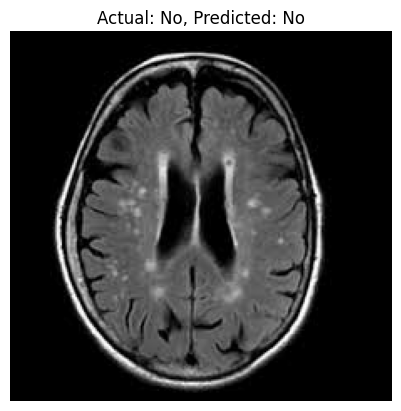

Class-wise probabilities: [0.5732142857142857, 0.4267857142857143]
Predicted Class: No


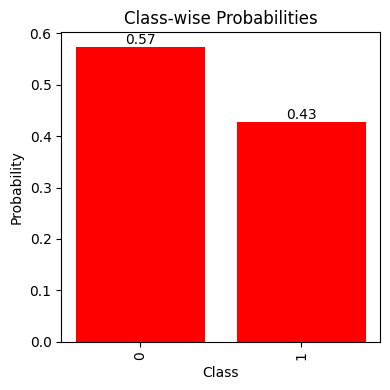

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


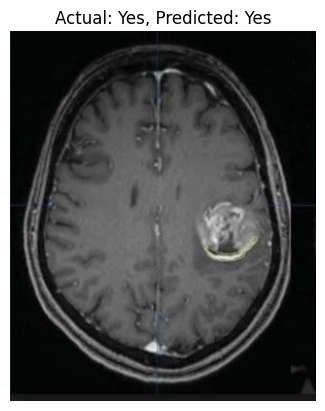

Class-wise probabilities: [0.3326190476190476, 0.6673809523809524]
Predicted Class: Yes


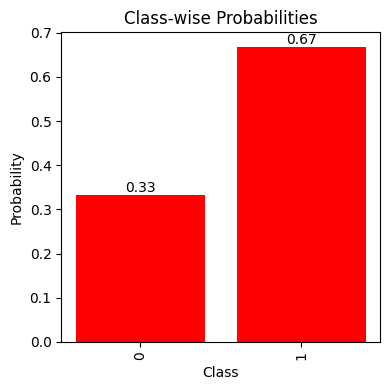

In [159]:
# Define the input image path
image_path = "/content/drive/My Drive/Brain Tumour Detection/Dataset/Binary/No/18 no.jpg"

# Example actual class, 0 for "No", 1 for "Yes"
actual_class = 0

# Assuming you have already loaded RFC_Model and feature_extractor_model
# Example usage
final_pred, rf_proba = predict_class(image_path, actual_class, RFC_Model, model)

# Print probabilities for verification
print("Class-wise probabilities:", rf_proba)

# Get the classes from the Random Forest model
classes = RFC_Model.classes_

# Output the prediction and probabilities
print("Predicted Class:", final_pred)

# Plotting the class-wise probabilities
plt.figure(figsize=(4, 4))
plt.bar(classes, rf_proba, color='r')
plt.title("Class-wise Probabilities")
plt.xlabel("Class")
plt.ylabel("Probability")
plt.xticks(range(len(classes)), classes, rotation=90)
for i, prob in enumerate(rf_proba):
    plt.text(i, prob, f'{prob:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Define the input image path
image_path1 = "/content/drive/My Drive/Brain Tumour Detection/Dataset/Binary/Yes/Y19.JPG"

# Example actual class, 0 for "No", 1 for "Yes"
actual_class1 = 1

# Assuming you have already loaded RFC_Model and feature_extractor_model
# Example usage
final_pred, rf_proba = predict_class(image_path1, actual_class1, RFC_Model, model)

# Print probabilities for verification
print("Class-wise probabilities:", rf_proba)

# Get the classes from the Random Forest model
classes = RFC_Model.classes_

# Output the prediction and probabilities
print("Predicted Class:", final_pred)

# Plotting the class-wise probabilities
plt.figure(figsize=(4, 4))
plt.bar(classes, rf_proba, color='r')
plt.title("Class-wise Probabilities")
plt.xlabel("Class")
plt.ylabel("Probability")
plt.xticks(range(len(classes)), classes, rotation=90)
for i, prob in enumerate(rf_proba):
    plt.text(i, prob, f'{prob:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()